<a href="https://colab.research.google.com/github/AdityaT26/InvestX/blob/main/Assignment_2/AdityaThakur_LSTM_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [84]:
PRED_PERIOD = 50 #days

In [85]:
def getStock(n):
  df = pd.read_csv('Train.csv')
  stocks = {}

  for i in range(1, df.shape[0]):
    if i%150==0:
      stocks[str(i//150)] = i
      
  return df.iloc[stocks[str(n)]-150:stocks[str(n)]]

In [86]:
df = getStock(18)
print(df.head(15))

            Date     Stock  liabilities      equity  total_assets  \
2550  2006-07-31  Stock 18   888.845961  511.726026   1400.571987   
2551  2006-08-31  Stock 18   673.683058  447.539372   1121.222430   
2552  2006-09-29  Stock 18   512.925508  678.085177   1191.010684   
2553  2006-10-31  Stock 18   381.480935  333.714700    715.195635   
2554  2006-11-30  Stock 18   132.887259  329.900539    462.787798   
2555  2006-12-29  Stock 18   868.297426  687.169940   1555.467366   
2556  2007-01-31  Stock 18   400.678168  572.176615    972.854783   
2557  2007-02-28  Stock 18   933.921854  831.195402   1765.117257   
2558  2007-03-30  Stock 18   581.443665  652.266359   1233.710023   
2559  2007-04-30  Stock 18   879.005224  825.469725   1704.474950   
2560  2007-05-31  Stock 18   630.438820  610.917515   1241.356336   
2561  2007-06-29  Stock 18   658.729111  102.298488    761.027599   
2562  2007-07-31  Stock 18   752.533061  948.697274   1701.230334   
2563  2007-08-31  Stock 18   604.3

In [87]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [88]:
df_for_training = df[cols].astype(float)

In [89]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [90]:
trainX = []
trainY = []

In [91]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [92]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (136, 14, 10).
trainY shape == (136, 1).


In [93]:
df_for_training_scaled

array([[ 1.34769731, -0.2075005 ,  0.78124394, ..., -0.66843402,
        -1.4876734 ,  0.72167519],
       [ 0.55397571, -0.45167037,  0.0790287 , ..., -0.66843402,
         0.49989299,  0.40480825],
       [-0.03904816,  0.42533964,  0.254459  , ..., -0.18182422,
         1.42928996,  0.14841433],
       ...,
       [ 0.66766715,  1.39656518,  1.37782933, ...,  0.89938138,
        -0.92491202, -0.87666623],
       [ 0.33838677, -0.11006542,  0.15785495, ..., -0.66843402,
        -0.89886741, -0.77349136],
       [-0.46009511,  0.8388819 ,  0.24081666, ..., -0.66843402,
         0.4309572 , -0.82043577]])

In [94]:
trainY

array([[-0.8688693 ],
       [-0.53583163],
       [-0.26348901],
       [-0.08524261],
       [ 0.05687201],
       [-0.22194498],
       [-0.3472704 ],
       [-0.23993415],
       [-0.04746749],
       [-0.0576935 ],
       [-0.18988304],
       [-0.26362731],
       [-0.4731528 ],
       [-0.34949121],
       [-0.09032551],
       [-0.02116352],
       [ 0.16508784],
       [ 0.39130931],
       [ 0.61244202],
       [ 0.90502713],
       [ 0.84479504],
       [ 0.97219503],
       [ 0.76819429],
       [ 0.87368395],
       [ 1.08996225],
       [ 0.99072017],
       [ 0.80993916],
       [ 0.93398175],
       [ 0.69579838],
       [ 0.61057847],
       [ 0.49864628],
       [ 0.66815614],
       [ 1.02892285],
       [ 1.35636478],
       [ 1.25683559],
       [ 1.40924397],
       [ 1.57209585],
       [ 1.66403808],
       [ 1.89812137],
       [ 1.82780182],
       [ 1.95922883],
       [ 1.89868417],
       [ 2.08874004],
       [ 1.79761781],
       [ 1.62992205],
       [ 1

In [95]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 64)            19200     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [96]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
41/41 [==============================] - 3s 20ms/step - loss: 0.5302 - val_loss: 0.1047
Epoch 2/5
41/41 [==============================] - 1s 13ms/step - loss: 0.1655 - val_loss: 0.4632
Epoch 3/5
41/41 [==============================] - 1s 13ms/step - loss: 0.0864 - val_loss: 0.0706
Epoch 4/5
41/41 [==============================] - 1s 13ms/step - loss: 0.1185 - val_loss: 0.0932
Epoch 5/5
41/41 [==============================] - 1s 13ms/step - loss: 0.0918 - val_loss: 0.0128


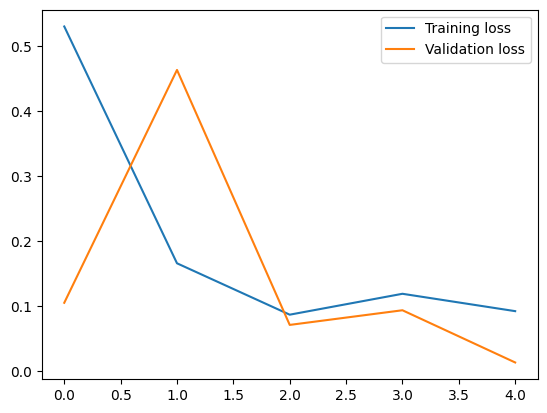

In [97]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [98]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [99]:
df2= df.head(150)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

2685   2017-10-31
2686   2017-11-30
2687   2017-12-29
2688   2018-01-31
2689   2018-02-28
2690   2018-03-30
2691   2018-04-30
2692   2018-05-31
2693   2018-06-29
2694   2018-07-31
2695   2018-08-31
2696   2018-09-28
2697   2018-10-31
2698   2018-11-30
2699   2018-12-31
Name: Date, dtype: datetime64[ns]


In [100]:
n_past = 1
n_days_for_prediction = PRED_PERIOD

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2018-12-31 00:00:00', freq='M'), Timestamp('2019-01-31 00:00:00', freq='M'), Timestamp('2019-02-28 00:00:00', freq='M'), Timestamp('2019-03-31 00:00:00', freq='M'), Timestamp('2019-04-30 00:00:00', freq='M'), Timestamp('2019-05-31 00:00:00', freq='M'), Timestamp('2019-06-30 00:00:00', freq='M'), Timestamp('2019-07-31 00:00:00', freq='M'), Timestamp('2019-08-31 00:00:00', freq='M'), Timestamp('2019-09-30 00:00:00', freq='M'), Timestamp('2019-10-31 00:00:00', freq='M'), Timestamp('2019-11-30 00:00:00', freq='M'), Timestamp('2019-12-31 00:00:00', freq='M'), Timestamp('2020-01-31 00:00:00', freq='M'), Timestamp('2020-02-29 00:00:00', freq='M'), Timestamp('2020-03-31 00:00:00', freq='M'), Timestamp('2020-04-30 00:00:00', freq='M'), Timestamp('2020-05-31 00:00:00', freq='M'), Timestamp('2020-06-30 00:00:00', freq='M'), Timestamp('2020-07-31 00:00:00', freq='M'), Timestamp('2020-08-31 00:00:00', freq='M'), Timestamp('2020-09-30 00:00:00', freq='M'), Timestamp('2020-10-31 00:00:00'

In [101]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

2/2 [==============================] - 0s 9ms/step


In [102]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [103]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [104]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-104-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
2550,2006-07-31,100.000000
2551,2006-08-31,98.512211
2552,2006-09-29,97.308362
2553,2006-10-31,97.230316
2554,2006-11-30,96.147446
...,...,...
2695,2018-08-31,92.342137
2696,2018-09-28,92.674102
2697,2018-10-31,92.495289
2698,2018-11-30,92.979728


In [105]:
df_forecast

,Date,price
0,2018-12-31,93.186745
1,2019-01-31,92.865837
2,2019-02-28,93.868629
3,2019-03-31,94.084122
4,2019-04-30,93.966156
5,2019-05-31,93.523506
6,2019-06-30,94.393730
7,2019-07-31,95.412086
8,2019-08-31,96.358185
9,2019-09-30,96.127808


<Axes: xlabel='Date'>

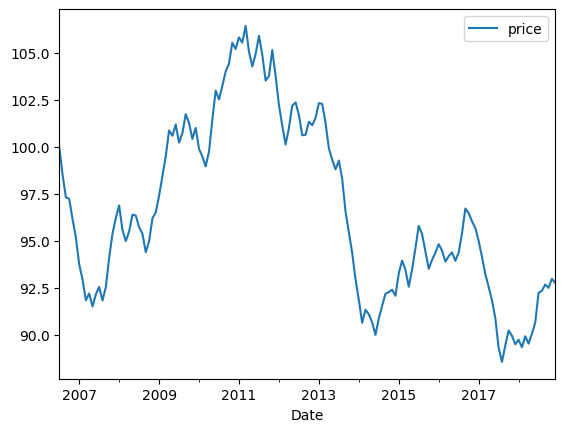

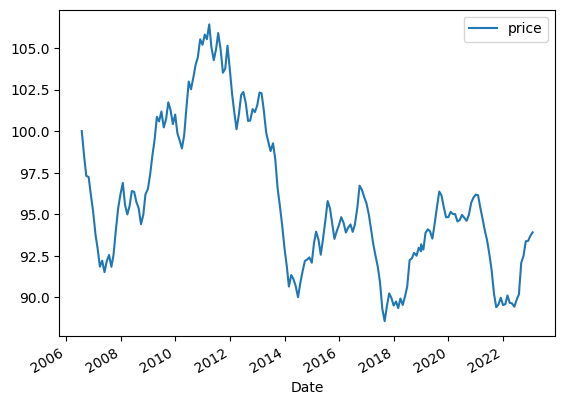

In [106]:
original.plot(x='Date', y='price')
f_forecast = pd.concat([original,df_forecast],axis=0)
f_forecast.plot(x='Date',y='price')


In [107]:
forcasted = df_forecast
forcasted_values = forcasted.loc[:,"price"]
forcasted_values = forcasted_values.tolist()
og_prices = df['price'].values[100:]

eff = []
for i in range (0, len(og_prices)):
  b = 100 - ((abs(og_prices[i] - forcasted_values[i]))/og_prices[i])*100
  eff.append(b)
  
print(eff) 

[99.14526929852735, 99.14024810157757, 99.35956436115633, 99.85358958864798, 99.45858591021893, 98.9542033710811, 99.01518977236948, 99.13562478861836, 99.40364600690177, 99.19031570592954, 98.955411600502, 98.61081524310129, 99.09912027580316, 99.18798769897832, 99.79893182302747, 99.44675296207394, 99.29265431703338, 99.50167764881766, 99.39354487251367, 99.1017394369954, 99.75958986636971, 99.5409976433473, 98.93574007595156, 99.50831495678803, 99.85012920402077, 99.51694767050986, 99.53583061494281, 99.35179393051115, 99.11658795733578, 99.05192688502623, 99.14996470292925, 99.18897380847005, 98.94983001439797, 99.05173263550928, 99.85418247791385, 99.70900104460567, 99.52546404609079, 99.90070965757518, 99.59190745618672, 99.64557703878269, 99.6680863011142, 99.88105885868639, 99.75368043979353, 99.47147957586125, 99.81796563235415, 99.85078267049425, 99.24991167082966, 99.04057397003635, 99.23311027191694, 98.7680372430052]


In [108]:
avgeff = np.average(eff)
print(avgeff)

99.37029522210463
